In [3]:
import xarray as xr 
path = 'data/riskindex/netcdf/max_temperature/'

## Import ERA-Interim data ##

In [6]:
data_era = xr.open_dataarray(path + 'Madrid_ERAI.nc')
data_era

<xarray.DataArray (time: 13870)>
array([284.25812, 281.57172, 280.14166, ..., 285.6272 , 285.39752, 282.95285],
      dtype=float32)
Coordinates:
    surface      float32 ...
  * time         (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2017-12-31
    day_of_year  (time) int64 ...
    year         (time) int64 ...
    lon          float64 ...
    lat          float64 ...
Attributes:
    long_name:     Maximum 2 metre temperature since previous post-processing
    units:         K
    cell_methods:  day_of_year: year: maximum
    city:          Madrid
    rcp:           None
    model_type:    era

## Import GCM data ##

In [7]:
data_gcm = xr.open_dataarray(path + 'Madrid_rcp45.nc')
data_gcm

<xarray.DataArray (time: 25915)>
array([287.283813, 285.842689, 283.586381, ..., 282.861178, 279.959751,
       281.916748])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2050-12-31
    lon      float64 ...
    lat      float64 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Daily Maximum Near-Surface Air Temperature
    units:          K
    original_name:  mo: m01s03i236
    cell_methods:   time: maximum
    cell_measures:  area: areacella
    city:           Madrid
    rcp:            rcp45
    model_type:     gcm

## Convert xarray data to pandas dataframe ##

In [8]:
from downloader import dataprocessing


# ERA data
df_era = dataprocessing.da_to_df(data_era)
df_era.head()

,data
time,
1980-01-01,284.258118
1980-01-02,281.571716
1980-01-03,280.141663
1980-01-04,280.547821
1980-01-05,279.989441


In [9]:
# GCM
df_gcm = dataprocessing.da_to_df(data_gcm)
df_gcm.head()

,data
time,
1980-01-01,287.283813
1980-01-02,285.842689
1980-01-03,283.586381
1980-01-04,282.834330
1980-01-05,281.538216


### Create some initial plots ###

In [31]:
import matplotlib.pyplot as plt 
plt.rcParams['figure.dpi']= 300

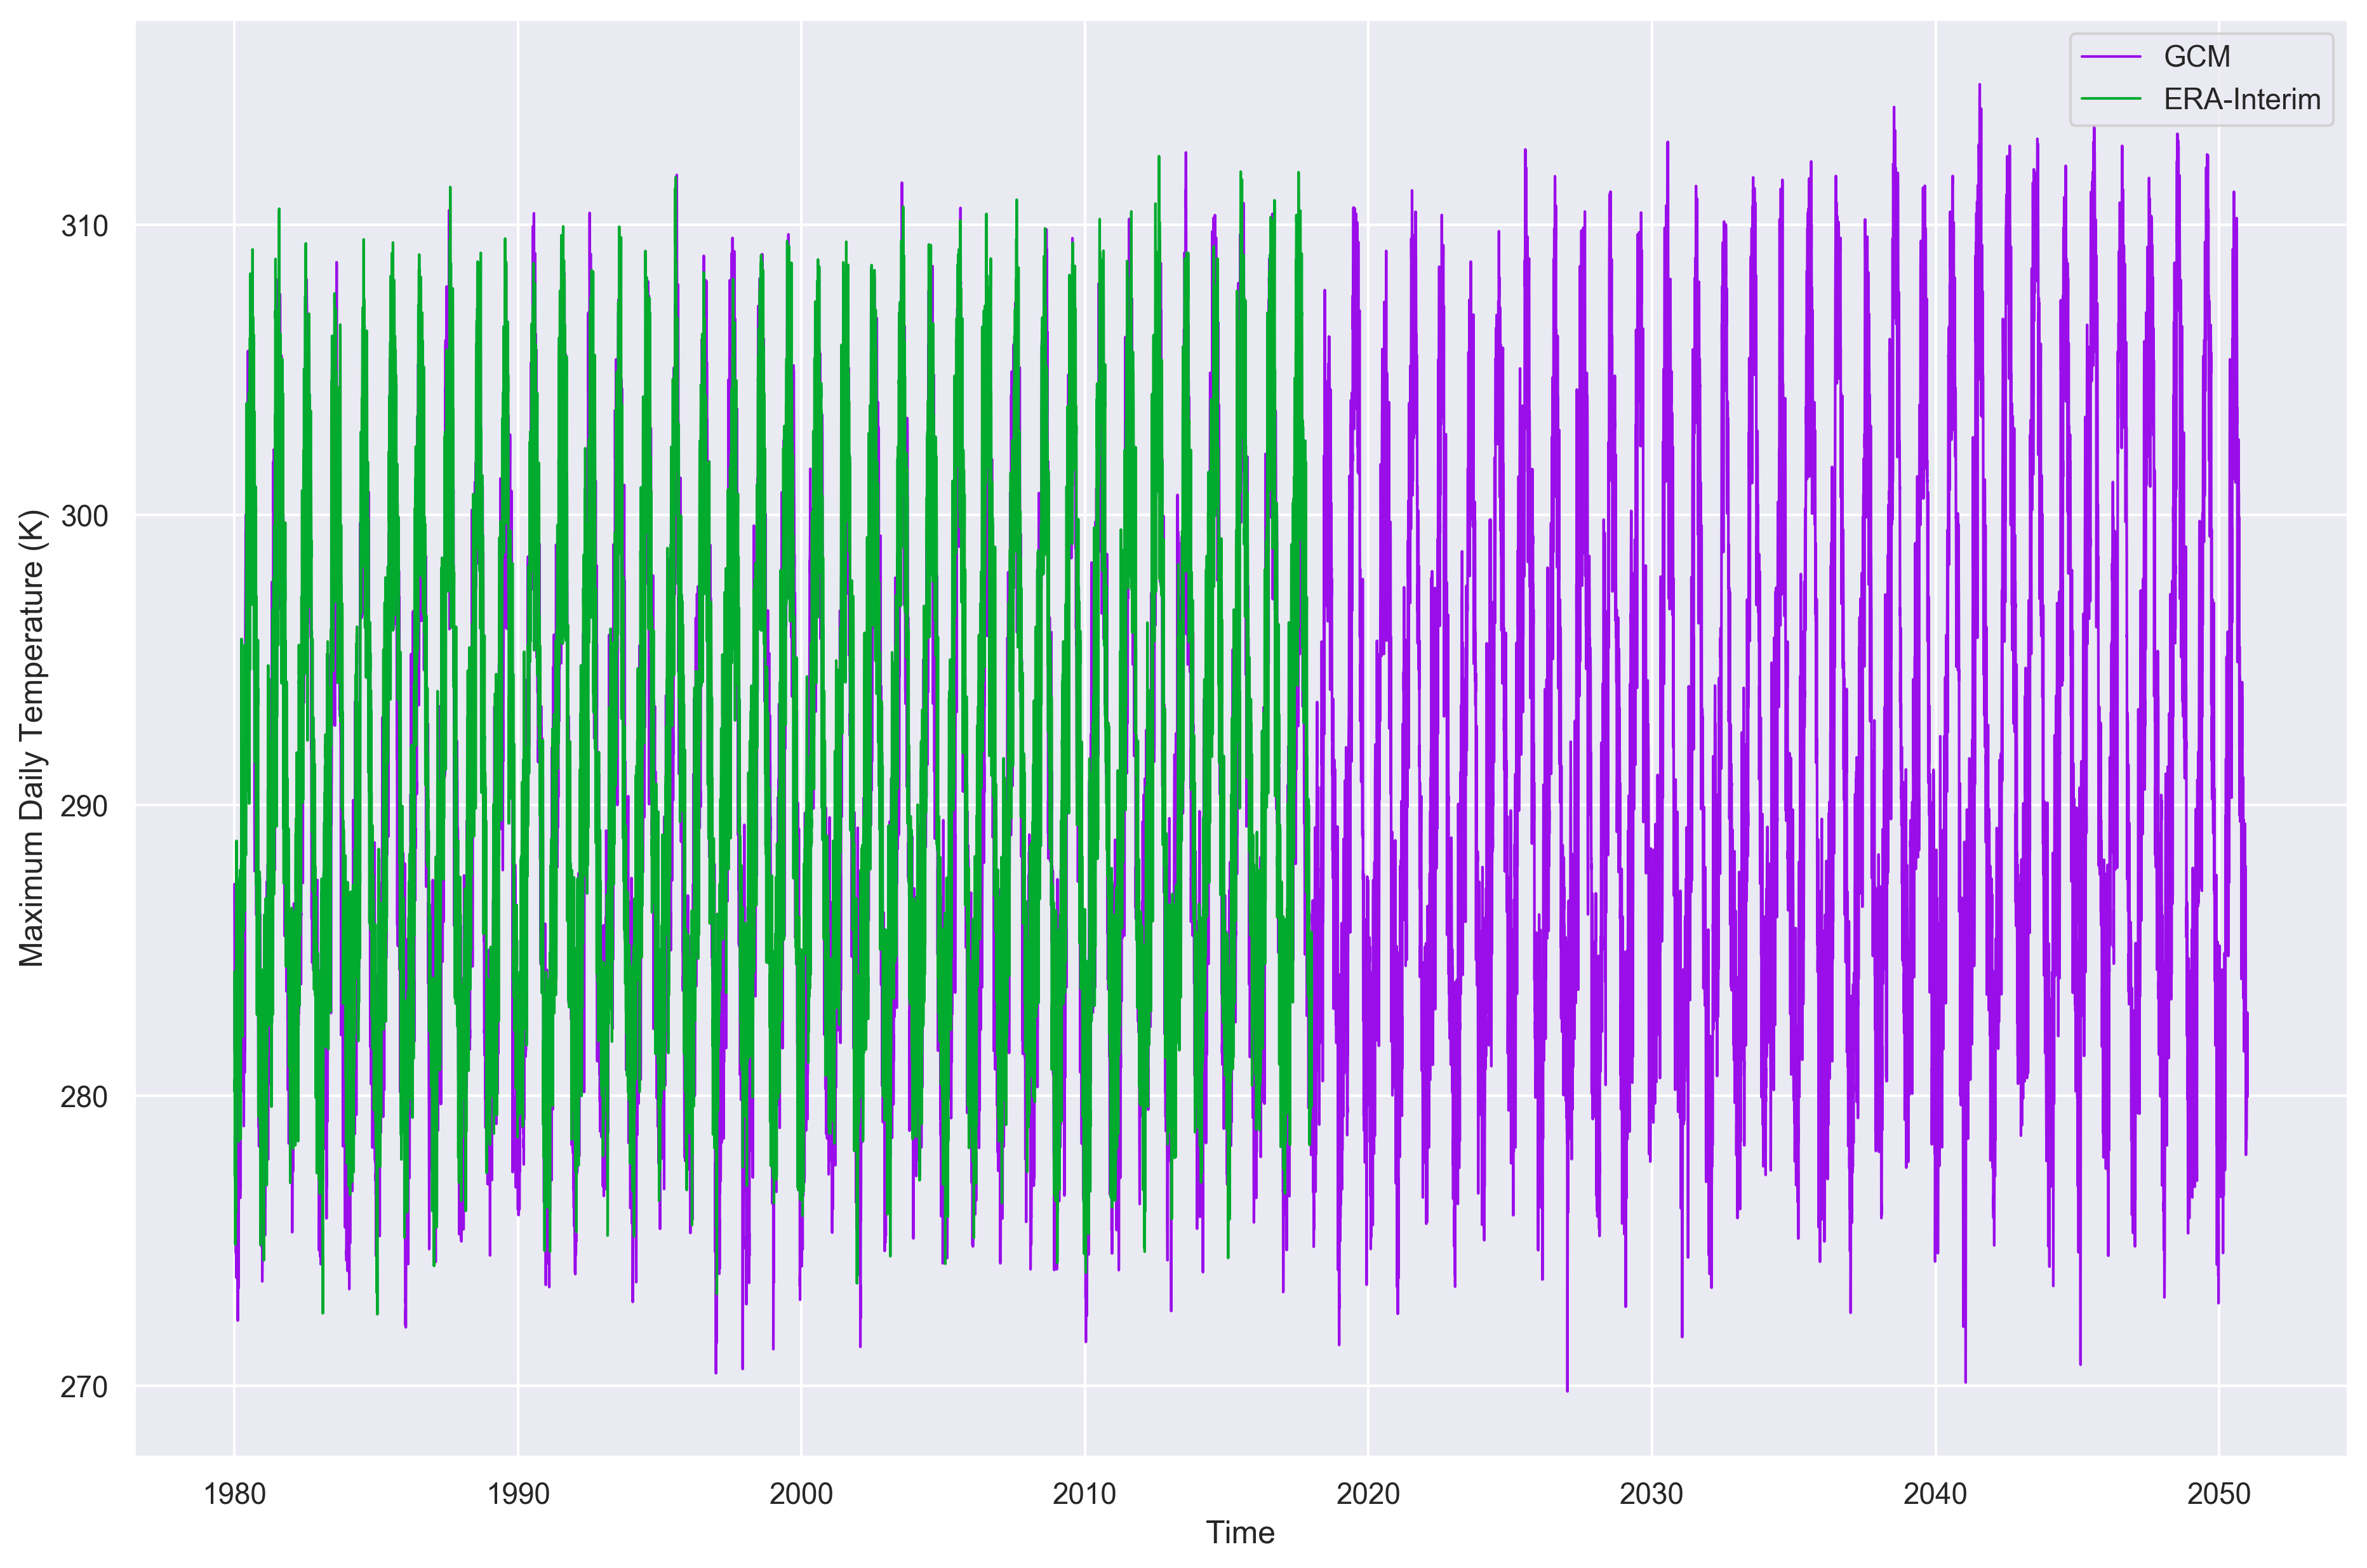

In [32]:
plt.figure()
plt.plot(df_gcm.index, df_gcm.data, label='GCM')
plt.plot(df_era.index, df_era.data, label='ERA-Interim')
plt.xlabel('Time')
plt.ylabel('Maximum Daily Temperature (K)')
plt.legend()
plt.show()

In [33]:
cutoffdate = '2017-12-31'

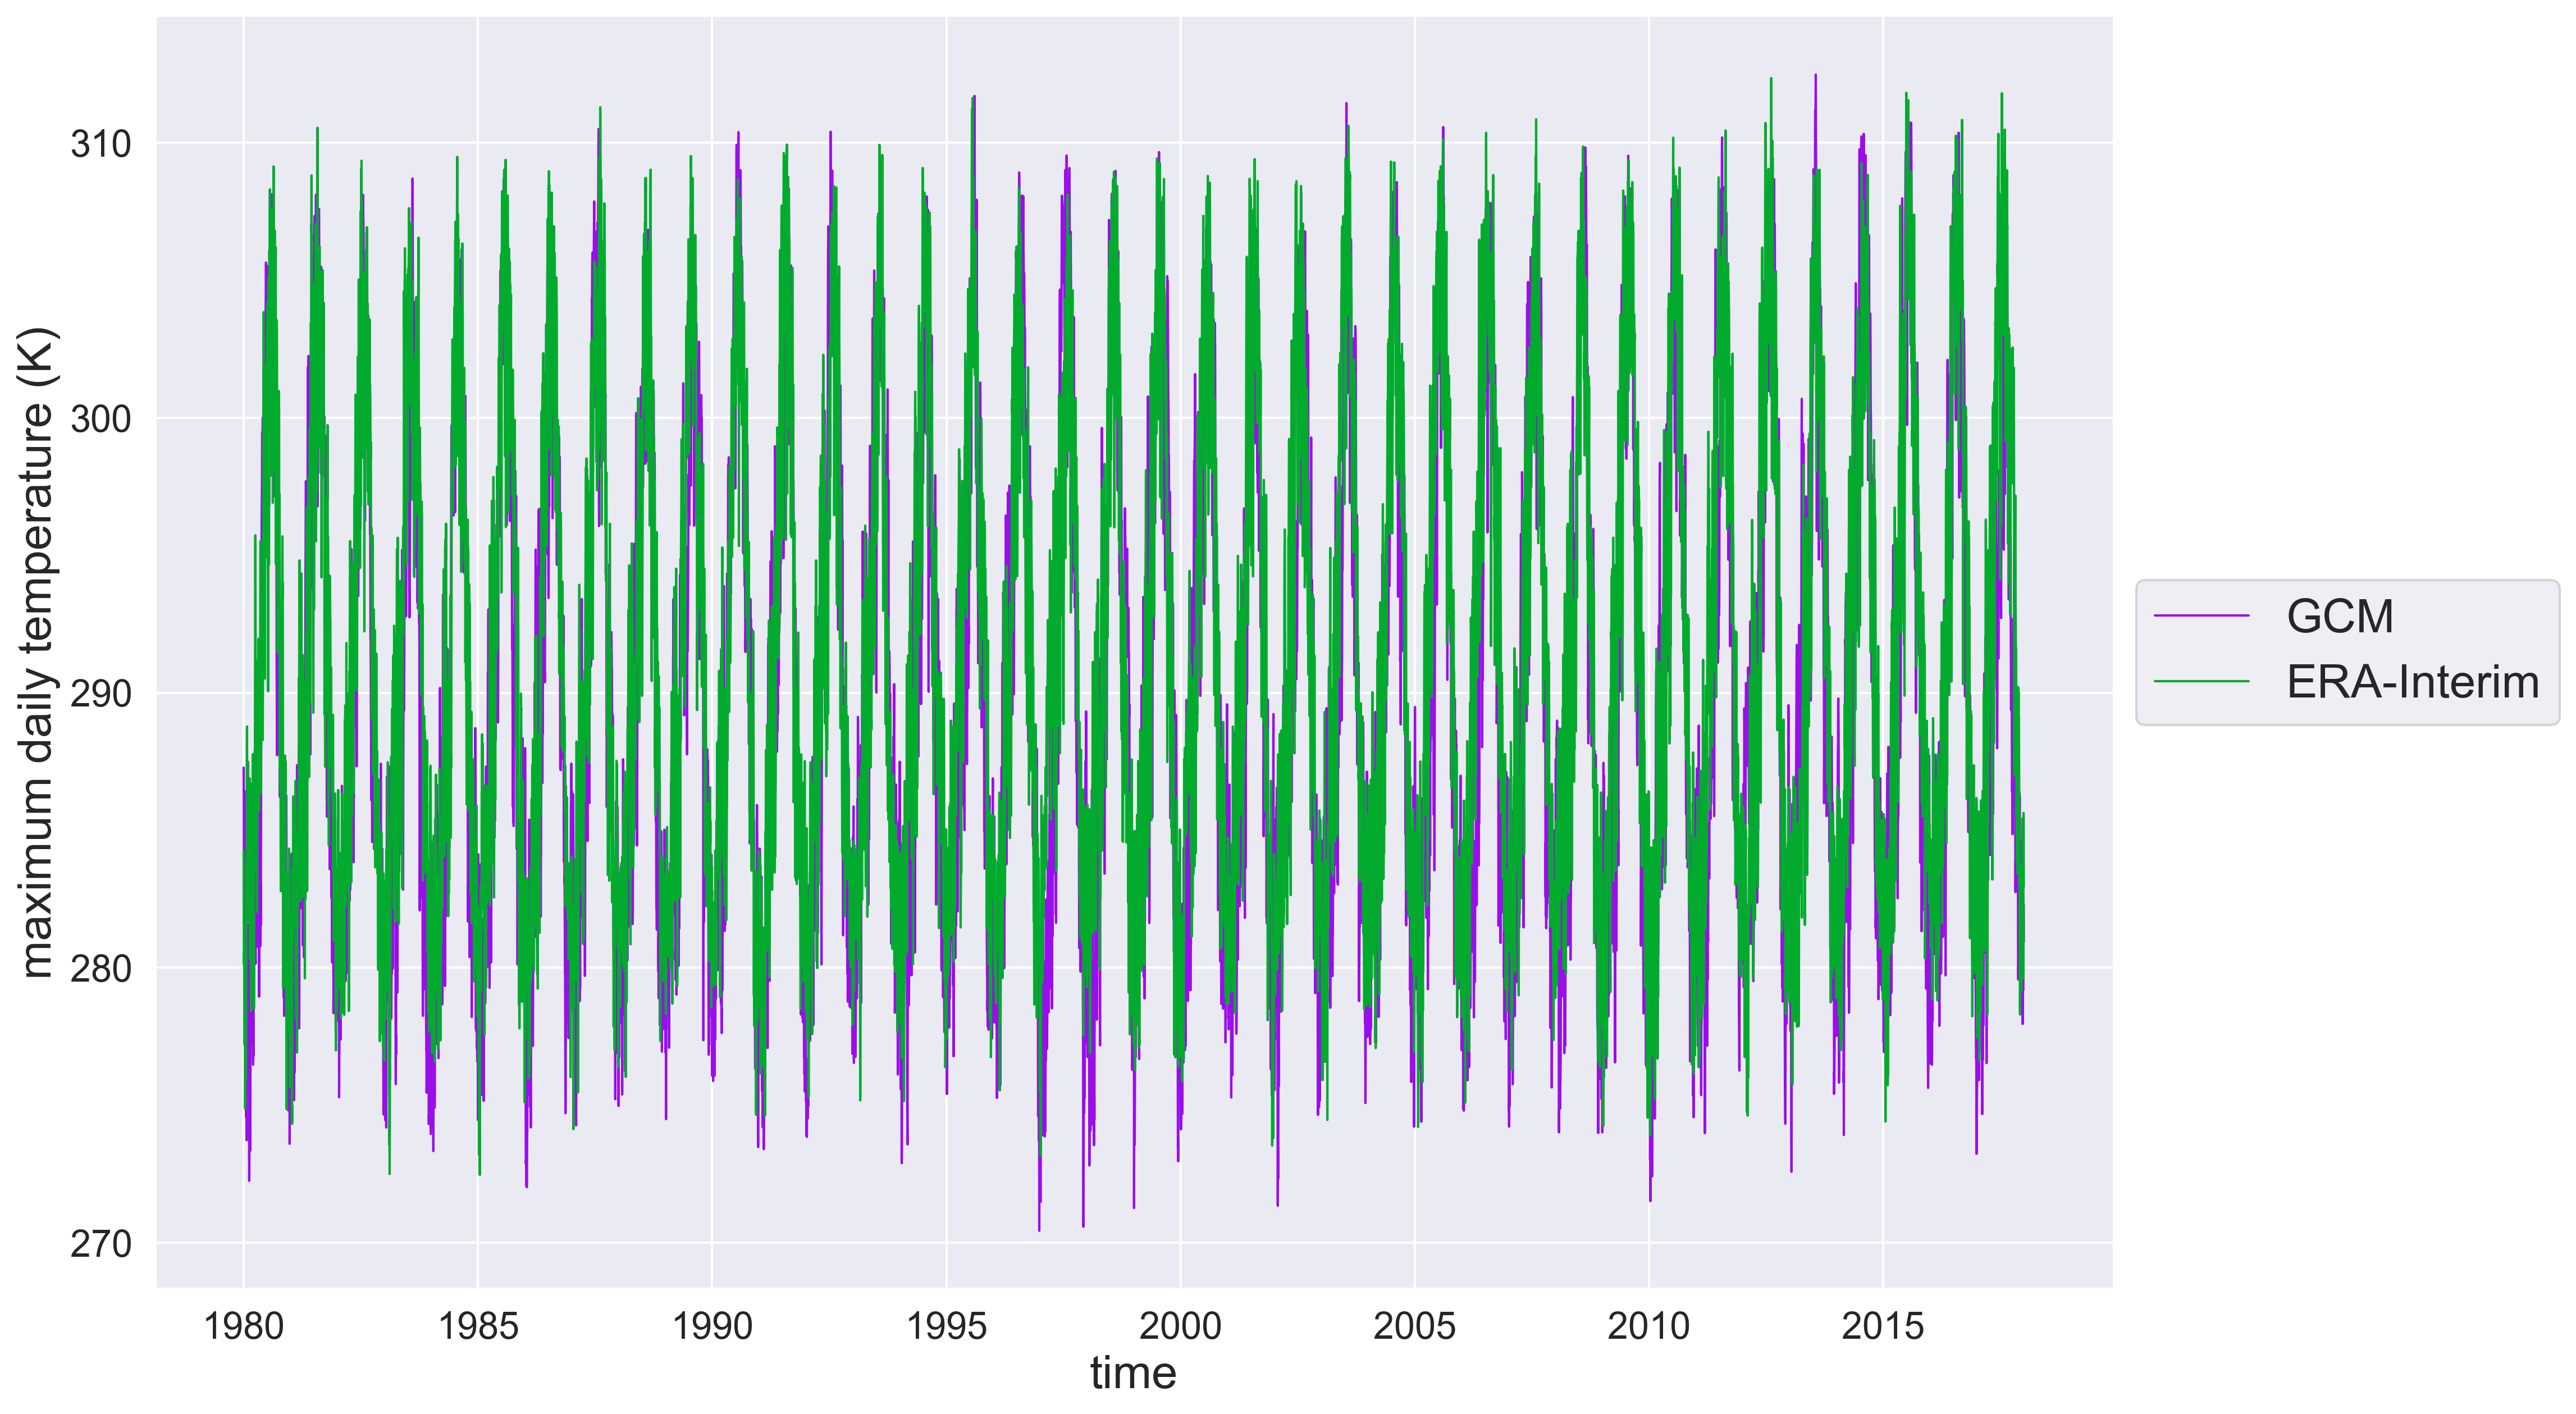

In [35]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15.0,10.0), "lines.linewidth": 1})

colors = ["violet", "kelly green"]
sns.set_palette(sns.xkcd_palette(colors))

ax = sns.lineplot(df_gcm[:cutoffdate].index, df_gcm[:cutoffdate].data, label='GCM')
sns.lineplot(df_era.index, df_era.data, label='ERA-Interim', ax=ax)

#ax.set_title("Madrid", fontsize="20")
ax.set_xlabel("time", fontsize="20")
ax.set_ylabel("maximum daily temperature (K)", fontsize="20")

ax.tick_params(labelsize=16)
ax.legend(fontsize = "20", loc='center left', bbox_to_anchor=(1, 0.5))


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)